# **HW2: Kinematics of Robot**

คำชี้แจง
1. ให้เขียนโค้ดเพื่อตอบโจทย์ในแต่ละข้อในไฟล์นี้ และแสดงวิธีทำข้อที่ 1 (ต้องมี) และข้ออื่น ๆ (ถ้ามี) ลงบนกระดาษทด (1 กระดาษทด/คู่)
2. ส่งงานเป็นไฟล์ ZIP โดยตั้งชื่อ FRA333_HW2_65xx_65xx.zip โดยมีไฟล์นี้ชื่อ HW2_notebook.ipynb และไฟล์กระดาษทดที่ตั้งชื่อ 65xx_65xx.pdf อยู่ข้างใน

สมาชิก

นาย สายฟ้า มีทอง 65340500054

นาย สหรัฐ สุขุมธรรมรัตน์ 65340500075

In [2]:
import roboticstoolbox as rtb
import numpy as np

from spatialmath import SE3
from math import pi

from spatialmath.base import *
from spatialmath import *

## 1. Modified DH-Parameters

กำหนดให้แขนกลซึ่งเป็น Serial Manipulator มี Home Configuration ดังภาพ โดยมีเฟรม {0} เป็น Base Frame ที่ใช้อ้างอิงในการทำระบบควบคุมต่าง ๆ และเฟรม {e} เป็นเฟรมของ End-effector (ให้ Link $L_2$ ตั้งฉากกับพื้นโลก)

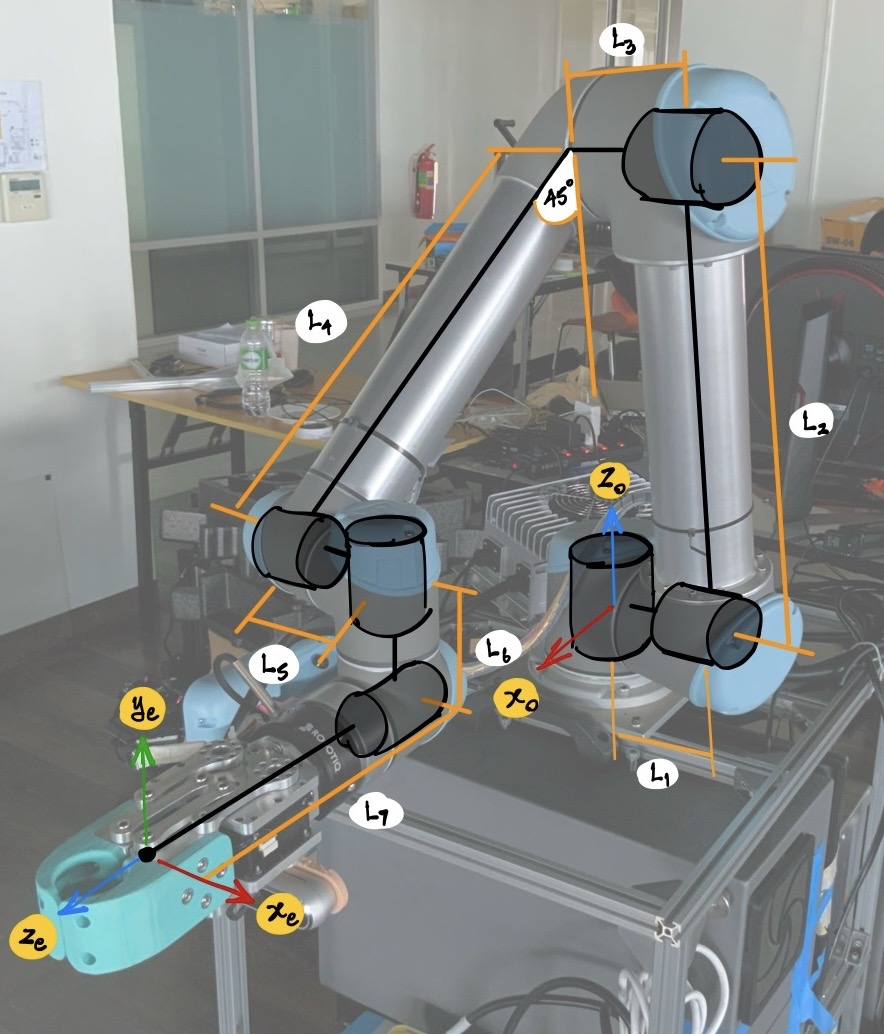

##### 1.1. จงหา MDH-Parameter ของแขนกล หากกำหนดให้ $L_1=200 mm$, $L_2=700 mm$, $L_3=200 mm$, $L_4=700 mm$, $L_5=200 mm$, $L_6=300 mm$, และ $L_7=500 mm$ ระบุวิธีทำและวิธีการตั้งแกนมาในกระดาษทด

In [3]:

# กำหนดค่าความยาวลิงค์ (ตัวอย่าง)
L1 = 0.2    # ความยาวลิงค์ 1
L2 = 0.7    # ความยาวลิงค์ 2
L3 = 0.2    # ความยาวลิงค์ 3
L4 = 0.7    # ความยาวลิงค์ 4
L5 = 0.2    # ความยาวลิงค์ 5
L6 = 0.3    # ความยาวลิงค์ 6
L7 = 0.5    # ความยาวลิงค์ 7

# สร้างหุ่นยนต์โดยใช้ DH Parameter
robot = rtb.DHRobot(
    [
        rtb.RevoluteMDH(offset= 0),
        rtb.RevoluteMDH(alpha= -pi/2,d = L1,offset=-pi/2),
        rtb.PrismaticMDH(a = L2,qlim=[0, 0]),
        rtb.RevoluteMDH(d= -L3,offset= 3*pi/4),
        rtb.RevoluteMDH(a=L4,offset=-pi/4),
        rtb.RevoluteMDH(d= L5,qlim=[0, 0]),
        rtb.RevoluteMDH(alpha=-pi/2,offset=-pi/2),
        rtb.RevoluteMDH(d= L6,qlim=[0, 0]),
        rtb.RevoluteMDH(alpha= -pi/2),
       rtb.RevoluteMDH(d= L7,qlim=[0, 0])
    ],
    name="RRR_robot"
)

# แสดงรายละเอียดของหุ่นยนต์
print(robot)

# กำหนดค่ามุมของข้อต่อ (radians)
q = [0,0,0,0,0,0,0,0,0,0]




DHRobot: RRR_robot, 10 joints (RRPRRRRRRR), dynamics, modified DH parameters
┌──────┬────────┬────────────┬──────┬─────────┬────────┐
│ aⱼ₋₁ │  ⍺ⱼ₋₁  │     θⱼ     │  dⱼ  │   q⁻    │   q⁺   │
├──────┼────────┼────────────┼──────┼─────────┼────────┤
│  0.0 │   0.0° │         q1 │  0.0 │ -180.0° │ 180.0° │
│  0.0 │ -90.0° │   q2 - 90° │  0.2 │ -180.0° │ 180.0° │
│  0.7 │   0.0° │       0.0° │   q3 │     0.0 │    0.0 │
│  0.0 │   0.0° │  q4 + 135° │ -0.2 │ -180.0° │ 180.0° │
│  0.7 │   0.0° │   q5 - 45° │  0.0 │ -180.0° │ 180.0° │
│  0.0 │   0.0° │         q6 │  0.2 │    0.0° │   0.0° │
│  0.0 │ -90.0° │   q7 - 90° │  0.0 │ -180.0° │ 180.0° │
│  0.0 │   0.0° │         q8 │  0.3 │    0.0° │   0.0° │
│  0.0 │ -90.0° │         q9 │  0.0 │ -180.0° │ 180.0° │
│  0.0 │   0.0° │        q10 │  0.5 │    0.0° │   0.0° │
└──────┴────────┴────────────┴──────┴─────────┴────────┘

┌──┬──┐
└──┴──┘



##### 1.2. จงแสดงให้เห็นว่า MDH-Parameter ที่ระบุมาในข้อ 1.1 สามารถแสดง Kinematic ของหุ่นยนต์ได้

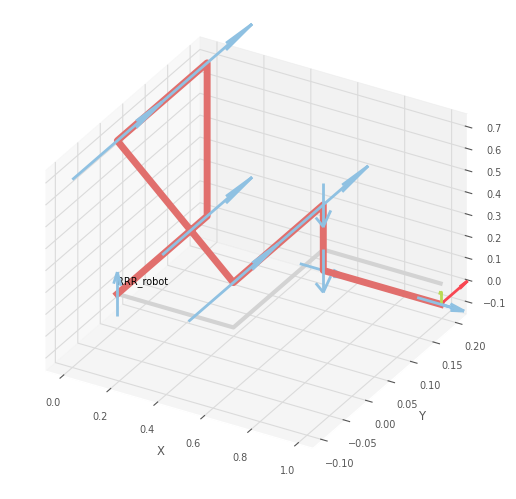

   0         0         1         0.995     
   1         0         0         0.2       
   0         1         0        -0.09497   
   0         0         0         1         



<Figure size 640x480 with 0 Axes>

In [4]:
# กำหนดค่ามุมของข้อต่อ (radians)
q = [0,0,0,0,0,0,0,0,0,0]
robot.plot(q)
# แสดงตำแหน่งของหุ่นยนต์ตามค่ามุมข้อต่อที่กำหนด
T = robot.fkine(q)
print(T)

## 2. Forward Kinematics

##### 2.1. จงหา POSE ของเฟรม {e} เมื่อกำหนดให้ [$q_1$, $q_2$, $q_3$, $q_4$, $q_5$, $q_6$] เท่ากับ 45, 30, 60, 30, 90, และ 270 องศา ตามลำดับ

DHRobot: RRR_robot, 9 joints (RRPRRRRRR), dynamics, modified DH parameters
┌──────┬────────┬────────────┬──────┬─────────┬────────┐
│ aⱼ₋₁ │  ⍺ⱼ₋₁  │     θⱼ     │  dⱼ  │   q⁻    │   q⁺   │
├──────┼────────┼────────────┼──────┼─────────┼────────┤
│  0.0 │   0.0° │         q1 │  0.0 │ -180.0° │ 180.0° │
│  0.0 │ -90.0° │   q2 - 90° │  0.2 │ -180.0° │ 180.0° │
│  0.7 │   0.0° │       0.0° │   q3 │     0.0 │    0.0 │
│  0.0 │   0.0° │  q4 + 135° │ -0.2 │ -180.0° │ 180.0° │
│  0.7 │   0.0° │   q5 - 45° │  0.0 │ -180.0° │ 180.0° │
│  0.0 │   0.0° │         q6 │  0.2 │    0.0° │   0.0° │
│  0.0 │ -90.0° │   q7 - 90° │  0.0 │ -180.0° │ 180.0° │
│  0.0 │   0.0° │         q8 │  0.3 │    0.0° │   0.0° │
│  0.0 │ -90.0° │         q9 │  0.0 │ -180.0° │ 180.0° │
└──────┴────────┴────────────┴──────┴─────────┴────────┘

┌──────┬─────────────────────────────────────┐
│ tool │ t = 0, 0, 0.5; rpy/xyz = 0°, 0°, 0° │
└──────┴─────────────────────────────────────┘

0.7853981633974483 0.5235987755982988 0 1

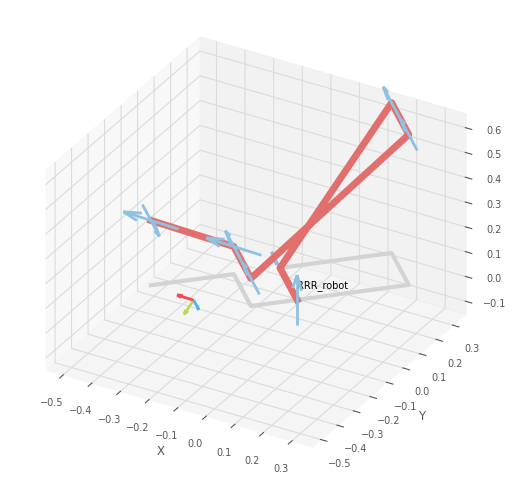

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'RRR_robot')

<Figure size 640x480 with 0 Axes>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import roboticstoolbox as rtb
import math
from spatialmath import SE3

# กำหนดค่าความยาวลิงค์ (ตัวอย่าง)
L1 = 0.2    # ความยาวลิงค์ 1
L2 = 0.7    # ความยาวลิงค์ 2
L3 = 0.2    # ความยาวลิงค์ 3
L4 = 0.7    # ความยาวลิงค์ 4
L5 = 0.2    # ความยาวลิงค์ 5
L6 = 0.3    # ความยาวลิงค์ 6
L7 = 0.5    # ความยาวลิงค์ 7

# สร้างหุ่นยนต์โดยใช้ DH Parameter
robot = rtb.DHRobot(
    [
        rtb.RevoluteMDH(offset= 0),
        rtb.RevoluteMDH(alpha= -pi/2,d = L1,offset=-pi/2),
        rtb.PrismaticMDH(a = L2,qlim=[0, 0]),
        rtb.RevoluteMDH(d= -L3,offset= 3*pi/4),
        rtb.RevoluteMDH(a=L4,offset=-pi/4),
        rtb.RevoluteMDH(d= L5,qlim=[0, 0]),
        rtb.RevoluteMDH(alpha=-pi/2,offset=-pi/2),
        rtb.RevoluteMDH(d= L6,qlim=[0, 0]),
        rtb.RevoluteMDH(alpha= -pi/2),
       
    ],tool = SE3.Tz(L7),
    name="RRR_robot"
)

# 
# แสดงรายละเอียดของหุ่นยนต์
print(robot)

# กำหนดค่ามุมของข้อต่อ (radians)
q = [0,0,0,0,0,0,0,0,0]

# แสดงตำแหน่งของหุ่นยนต์ตามค่ามุมข้อต่อที่กำหนด
print(pi/4,pi/6,0,pi/3,pi/6,0,pi/2,0,-pi/2)
q2 = [pi/4,pi/6,0,pi/3,pi/6,0,pi/2,0,-pi/2]
T2 = robot.fkine(q2)
print(T2)
robot.plot(q2)




##### 2.2. จงแสดงให้เห็นว่าคำตอบข้อที่ตอบมาในข้อที่ 2.1. เป็นคำตอบที่ถูกต้อง

ทำการเช็คคำตอบจากการหามุม q ด้วยวิธี IK โดยมีค่าความคลาดเคลื่อนอยู่ที่ 0.01

Initial solution does not match q2, trying multiple initial guesses...
Attempt 1: Solution does not match q2.
Attempt 2: Solution does not match q2.
Attempt 3: Solution does not match q2.
Attempt 4: Solution does not match q2.
Attempt 5: Solution does not match q2.
Attempt 6: Solution does not match q2.
Attempt 7: Solution does not match q2.
Attempt 8: Solution does not match q2.
Attempt 9: Solution does not match q2.
Attempt 10: Solution does not match q2.
Attempt 11: Solution does not match q2.
Attempt 12: Solution does not match q2.
Attempt 13: Solution does not match q2.
Attempt 14: Solution does not match q2.
Attempt 15: Solution does not match q2.
Attempt 16: Solution does not match q2.
Attempt 17: Solution does not match q2.
Attempt 18: Solution does not match q2.
Attempt 19: Solution does not match q2.
Attempt 20: Solution does not match q2.
Attempt 21: Solution does not match q2.
Attempt 22: Solution does not match q2.
Attempt 23: Solution does not match q2.
Attempt 24: Soluti

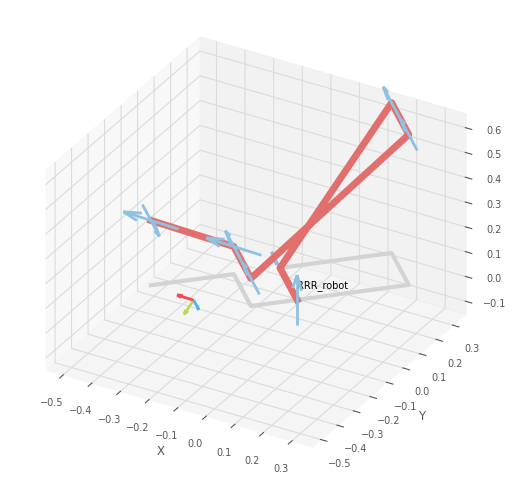

<Figure size 640x480 with 0 Axes>

In [6]:
tolerance = 0.01

# Attempt to solve IK using q2 as the initial guess
c_q = robot.ikine_LM(Tep=T2, q0=q2)

# Check if the solution matches q2 within the tolerance
if np.allclose(c_q.q, q2, atol=tolerance):
    print("Solution matches q2:")
    print("IK Solution:", c_q.q)
else:
    print("Initial solution does not match q2, trying multiple initial guesses...")

    # Now try multiple initial guesses
    max_attempts = 1000
    found_solution = False

    for i in range(max_attempts):
        # Generate a random initial guess near q2
        q0 = q2 + np.random.uniform(-0.1, 0.1, size=robot.n)
        
        # Ensure the fixed joints remain at their fixed values
        fixed_joint_indices = [2, 5, 7]  # Indices of q3, q6, q8
        for idx in fixed_joint_indices:
            q0[idx] = 0  # Set fixed joints to their known values

        # Perform IK with the new initial guess
        c_q = robot.ikine_LM(Tep=T2, q0=q0)

        # Check if the solution matches q2
        if np.allclose(c_q.q, q2, atol=tolerance):
            print(f"Found matching solution on attempt {i+1}:")
            print("IK Solution:", c_q.q)
            print("หา IK ที่ค่าความคลาดเคลื่อนเพียง 0.01 จะได้ Input q คือ")
            print("Input q",q2)
            print("ทำการ plot q2 จาก IK")
            robot.plot(q2)
            found_solution = True
            break
        else:
            print(f"Attempt {i+1}: Solution does not match q2.")

    if not found_solution:
        print("Could not find a solution matching q2 within the given attempts.")

## 3. Inverse Kinematics

##### 3.1. หากต้องการควบคุมให้ End-effector ไปอยู่ที่ตำแหน่ง x = 511 mm, y = 684 mm, z = 926 mm โดยมี roll = 30°, pitch = 45°, yaw = 60° (Fixed Axis X-Y-Z) จะมีวิธีการที่สามารถหมุนข้อต่อให้ End-effector อยู่ในท่าทางดังกล่าวได้กี่วิธี เพราะอะไร

![alt text](https://www.researchgate.net/profile/Nick-Van-Oosterwyck/publication/326717734/figure/fig5/AS:654430609354752@1533039824003/The-UR10-can-have-8-possible-solutions-for-a-desired-end-effector-pose-increasing-the.png)

จะสามารถทำได้ทั้งหมด 8 ท่า การที่สามารถทำได้ 8 ท่าทางในขณะที่ตำแหน่งปลาย end-effector ยังคงเหมือนเดิม เกิดจากความยืดหยุ่นในการปรับมุมข้อต่อที่แตกต่างกัน

ในแต่ละ Pattern (1-8) จะมีการตั้งค่ามุมข้อต่อที่แตกต่างกัน โดยมีข้อต่อดังนี้ 

Elbow Joint: มี 2 ทิศทาง (Up, Down)

Wrist Joint: มี 2 ทิศทาง (Tool Up, Tool Down)

Shoulder Joint: มี 2 ทิศทาง (Left Side, Right Side)

จึงจะได้ Total Configurations = Shoulder × Elbow × Wrist = 2 × 2 × 2 = 8


แต่อาจจะต้องพิจารณาความเป็นอิสระ และข้อจำกัดต่าง ๆ ที่อาจเกิดขึ้นในการเคลื่อนไหวของหุ่นยนต์ด้วย

##### 3.2. การจะควบคุมให้ End-effector อยู่ในท่าทางดังกล่าวต้องหมุนแต่ละข้อต่ออย่างไรบ้าง 

โดยในขั้นตอนนี้ เมื่อทำ code ไปจึงพบว่า DH parameter ตัวเก่านั้น ไม่สามารถนำมาใช้หาคำตอบ inverse ได้ เนื่องจาก DH parameter ตัวก่อนได้มีการใส่ Fix frame เข้าไป แต่ code ที่เขียนมานั้น ไม่รองรับ fix frame  จึงใส่เข้าไปใน revolute joint แต่เมื่อนำมาทำ inverse kinematic นั้น บางครั้งในการ check คำตอบจะเกิดปัญหาขึ้นที่ fix frame จึงทำการคิดคำณวน Dh parameter ขึ้นมาใหม่ (ใส่ไว้ใน กระดาษทดเรียบร้อยแล้ว) โดยค่าต่างๆ ของ DH parameter นั้นเท่าเดิม

In [7]:
# กำหนดค่าความยาวลิงค์ (ตัวอย่าง)
L1 = 0.2
L2 = 0.7
L3 = 0.2
L4 = 0.7
L5 = 0.2
L6 = 0.3
L7 = 0.5

# Define the robot using Modified DH parameters
robot2 = rtb.DHRobot(
    [
        rtb.RevoluteMDH(offset=0),
        rtb.RevoluteMDH(alpha=-np.pi/2, d=L1, offset=-np.pi/2),
        rtb.RevoluteMDH(a=L2,d= -L3, offset=3*np.pi/4),
        rtb.RevoluteMDH(a=L4,d= L5, offset=-np.pi/4),
        rtb.RevoluteMDH(alpha=np.pi/2, d=-L6, offset=np.pi/2),
        rtb.RevoluteMDH(alpha=np.pi/2, offset=0)
    ],
    tool=SE3.Tz(L7),
    name="RRRRRR_Robot"
)
q2 = [0,0,0,0,0,0]
T3 = robot2.fkine(q2)
print(T3)


   0         0         1         0.995     
   1         0         0         0.2       
   0         1         0        -0.09497   
   0         0         0         1         



***Code ส่วนี้ใช้เวลาในการ Run ประมาณ 15 วินาที*** <br>
โดยการนำค่าposition และ Orientation ที่ต้องการมาใส่ไว้ที่ T_desired จากจึงใช้การ inverse kinematic ออกมาเพื่อหาผลลัพ และ นำมาเก็บไว้ จากนั้นจึง plot ออกมาแค่ผลลัพท์ ที่ท่าทางไม่ซ้ำกัน จะเห็นได้ว่ามีแค่ 8 รูปแบบ หรือ ท่าทาง ที่ไม่ซ้ำกัน ตามข้อ 3.1

Number of unique solutions found: 8
Joint angles (IK solution): [ 0.95251912  1.24146354  2.17536061  2.11602854 -0.45545257 -1.49629182]


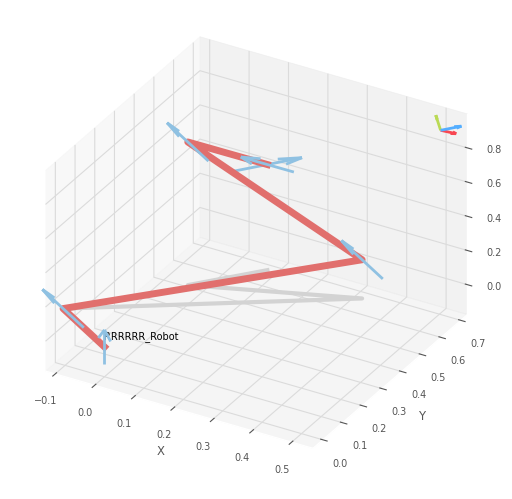

Joint angles (IK solution): [-1.46126713 -1.33146021 -0.34428828  2.9340462   2.26991078 -2.27852867]


<Figure size 640x480 with 0 Axes>

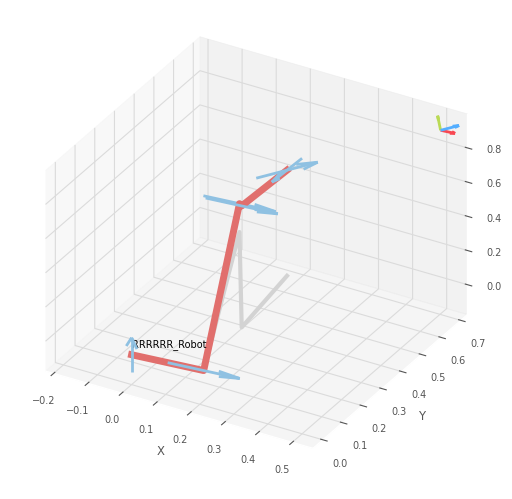

Joint angles (IK solution): [ 0.95251921 -0.51016662 -0.60456434  0.36439834 -0.45545273 -1.49629182]


<Figure size 640x480 with 0 Axes>

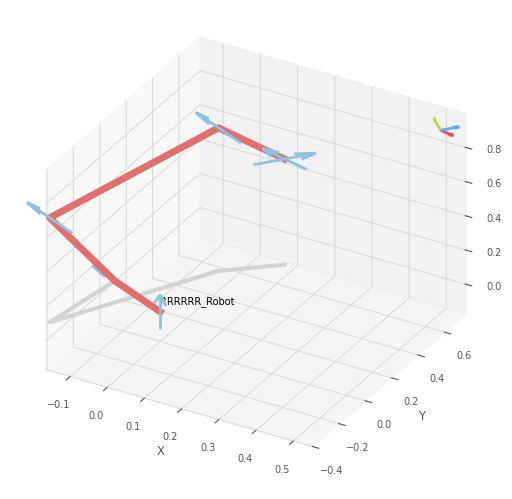

Joint angles (IK solution): [-1.46126713  0.680446    1.91508461 -1.3372329   2.26991078 -2.27852867]


<Figure size 640x480 with 0 Axes>

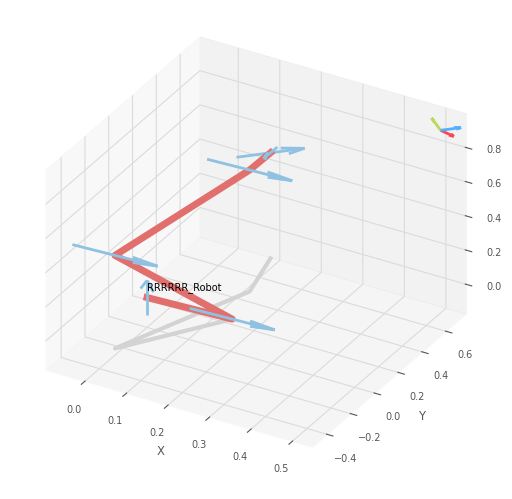

Joint angles (IK solution): [ 0.95251913  0.13606674 -0.48620087  2.74139416 -2.68614008  1.64530083]


<Figure size 640x480 with 0 Axes>

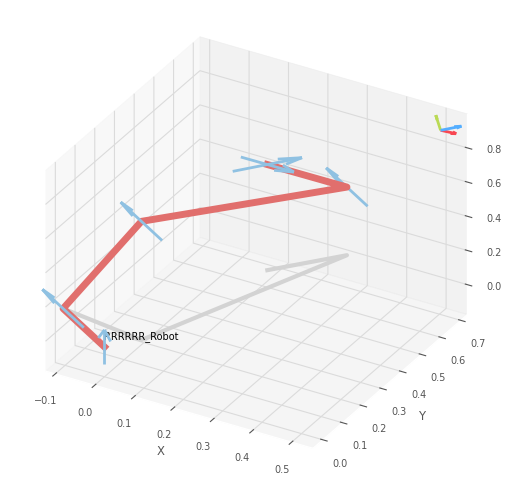

Joint angles (IK solution): [-1.46126672 -1.80478797 -0.73771973  0.65921183  0.87168252  0.86306475]


<Figure size 640x480 with 0 Axes>

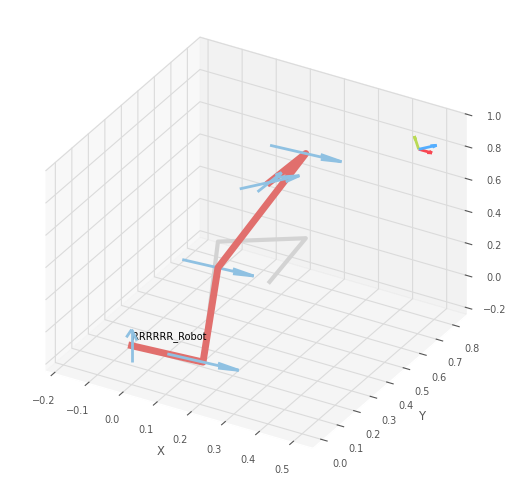

Joint angles (IK solution): [ 0.95251914  2.00606044  2.05699714 -1.67179755 -2.68614008  1.64530083]


<Figure size 640x480 with 0 Axes>

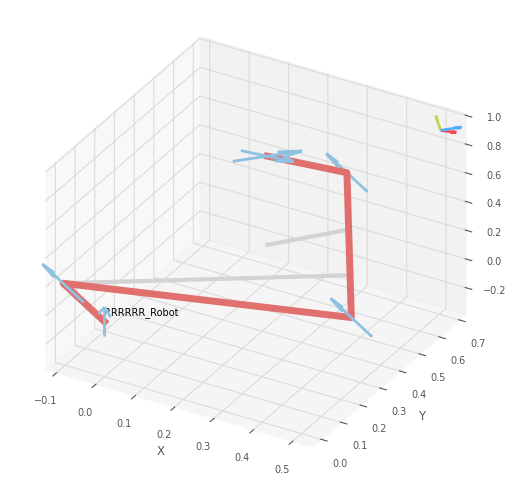

Joint angles (IK solution): [-1.46126713 -0.18631309  2.30851662  2.27768681  0.8716819   0.863064  ]


<Figure size 640x480 with 0 Axes>

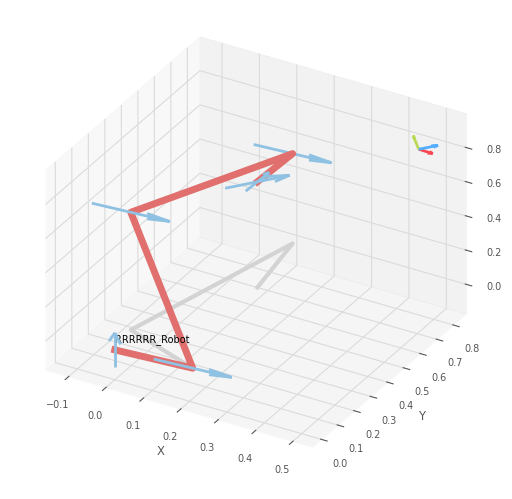

<Figure size 640x480 with 0 Axes>

In [8]:


# Desired position (in meters) and orientation (in radians)
x = 0.511
y = 0.684
z = 0.924

roll = np.deg2rad(30)
pitch = np.deg2rad(45)
yaw = np.deg2rad(60)

# Desired pose as an SE3 object
T_desired = SE3(x, y, z) @ SE3.RPY(roll, pitch, yaw)

def are_same_pose(sol1, sol2, threshold=1e-2):
    return np.allclose(sol1, sol2, atol=threshold)

def remove_duplicates(solutions, threshold=1e-1):
    unique_solutions = []
    for sol in solutions:
        if not any(are_same_pose(sol, existing_sol, threshold=threshold) for existing_sol in unique_solutions):
            unique_solutions.append(sol)
    return np.array(unique_solutions)

n_attempts = 1000
solutions = []

# Generate solutions using random initial guesses
for i in range(n_attempts):
    q0 = np.random.uniform(-np.pi, np.pi, robot2.n)
    sol = robot2.ikine_LM(T_desired, q0=q0)
    
    if sol.success and len(sol.q) == robot2.n:
        solutions.append(sol.q)

# Remove duplicate or close solutions
unique_solutions = remove_duplicates(solutions)

# Check how many unique solutions we have
print(f"Number of unique solutions found: {len(unique_solutions)}")

# Plot each unique solution and print joint angles
for q in unique_solutions:
    print(f"Joint angles (IK solution): {q}")
    robot2.plot(q, block=False)

##### 3.3. จงแสดงให้เห็นว่าการหมุนข้อต่อที่ตอบมาในข้อ 3.2. เป็นคำตอบที่ถูกต้อง

ทำการเช็คว่าค่าการหมุนที่คุณได้รับจากการคำนวณ IK นั้นสามารถทำให้หุ่นยนต์ไปยังตำแหน่งที่ต้องการได้จริงหรือไม่ 
โดยใช้วิธีการเปรียบเทียบตำแหน่งที่คำนวณได้จาก FK

ถ้า ถูก จะเจอ solution และทำการ plot ออกมา

ถ้า ผิด จะขึ้นว่า "Solution ... does not match the desired pose."

คำตอบที่ 1 ถูกต้อง
Valid solution found: [ 0.95251912  1.24146354  2.17536061  2.11602854 -0.45545257 -1.49629182]


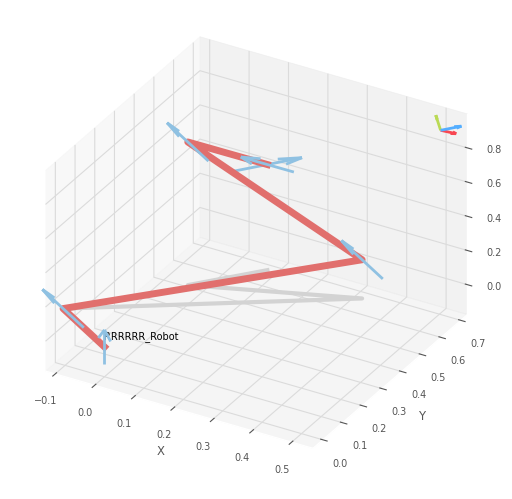

คำตอบที่ 2 ถูกต้อง
Valid solution found: [-1.46126713 -1.33146021 -0.34428828  2.9340462   2.26991078 -2.27852867]


<Figure size 640x480 with 0 Axes>

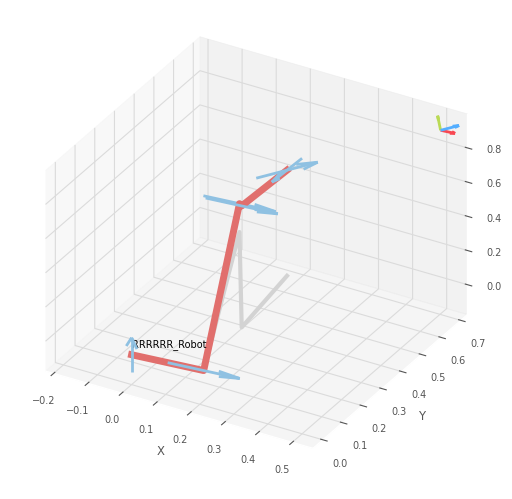

คำตอบที่ 3 ถูกต้อง
Valid solution found: [ 0.95251921 -0.51016662 -0.60456434  0.36439834 -0.45545273 -1.49629182]


<Figure size 640x480 with 0 Axes>

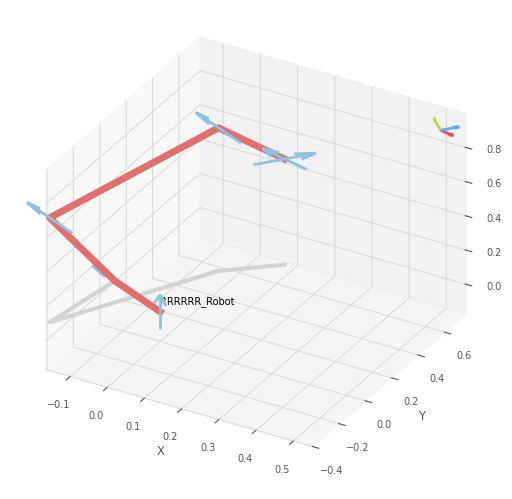

คำตอบที่ 4 ถูกต้อง
Valid solution found: [-1.46126713  0.680446    1.91508461 -1.3372329   2.26991078 -2.27852867]


<Figure size 640x480 with 0 Axes>

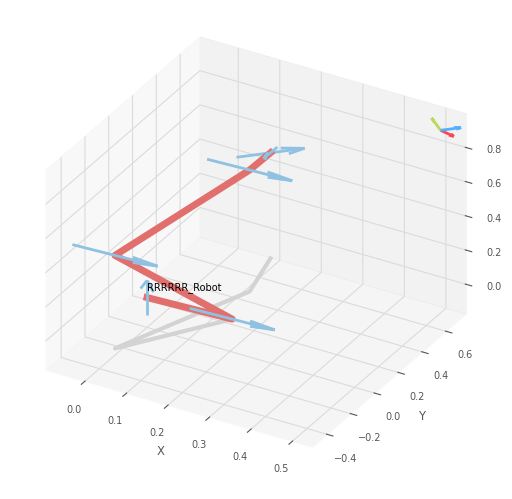

คำตอบที่ 5 ถูกต้อง
Valid solution found: [ 0.95251913  0.13606674 -0.48620087  2.74139416 -2.68614008  1.64530083]


<Figure size 640x480 with 0 Axes>

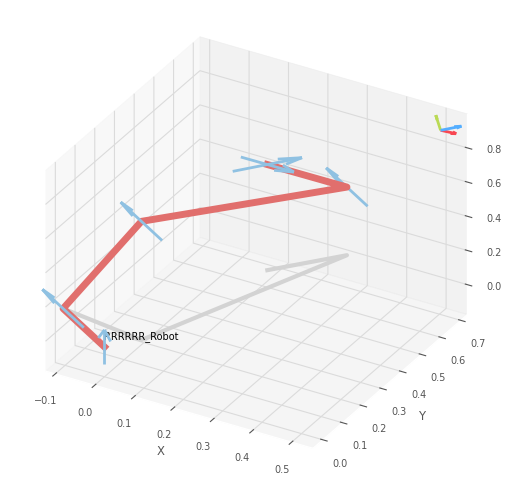

คำตอบที่ 6 ถูกต้อง
Valid solution found: [-1.46126672 -1.80478797 -0.73771973  0.65921183  0.87168252  0.86306475]


<Figure size 640x480 with 0 Axes>

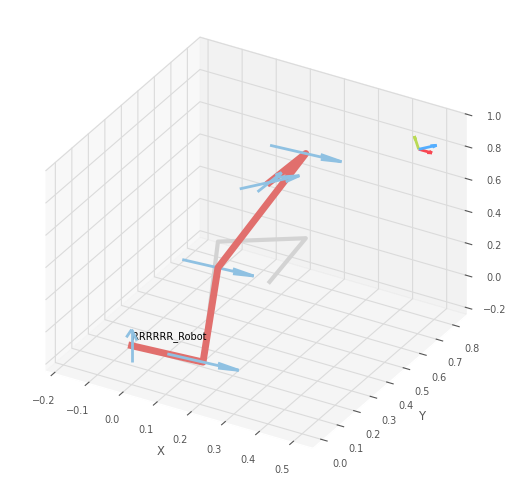

คำตอบที่ 7 ถูกต้อง
Valid solution found: [ 0.95251914  2.00606044  2.05699714 -1.67179755 -2.68614008  1.64530083]


<Figure size 640x480 with 0 Axes>

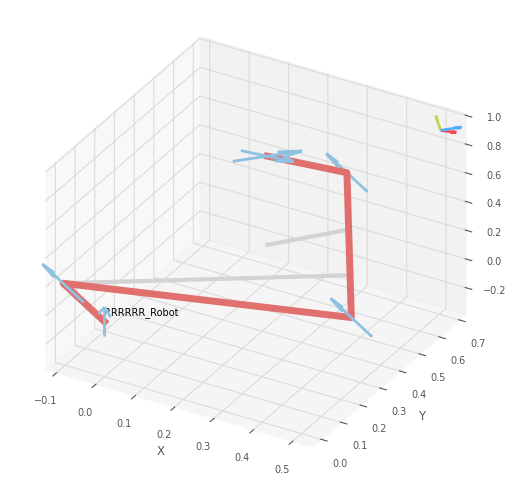

คำตอบที่ 8 ถูกต้อง
Valid solution found: [-1.46126713 -0.18631309  2.30851662  2.27768681  0.8716819   0.863064  ]


<Figure size 640x480 with 0 Axes>

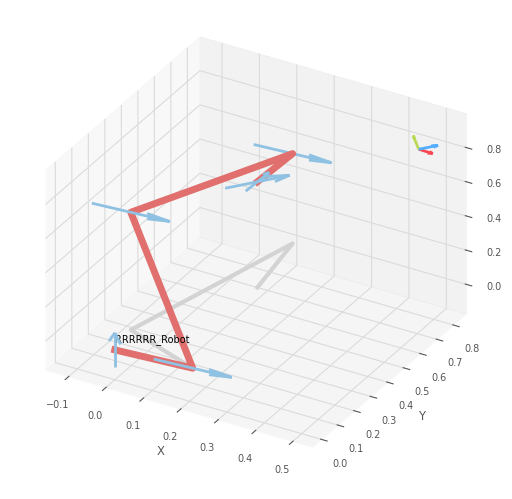

<Figure size 640x480 with 0 Axes>

In [9]:
# Initialize a counter for valid solutions
valid_solution_index = 1

# Iterate over unique solutions and check their end-effector poses
for q in unique_solutions:
    # Calculate the end-effector pose using forward kinematics
    T_actual = robot2.fkine(q)
    
    # Compare the actual pose with the desired pose
    if are_same_pose(T_actual, T_desired):
        print(f"คำตอบที่ {valid_solution_index} ถูกต้อง")
        print(f"Valid solution found: {q}")
        robot2.plot(q, block=False)
        valid_solution_index += 1  # Increment the counter for the next valid solution
    else:
        print(f"Solution {q} does not match the desired pose.")

## 4. Workspace

##### 4.1. จงแสดงให้เห็น Workspace ของหุ่นยนต์

***Code ส่วนี้ใช้เวลาในการ Run ประมาณ 2 นาที***
- โดยจะเป็นการ plot ความเป็นไปได้ของ แต่ละ joint ของหุ่นออกมา และ นำมา plot เป้นกราฟ และ หาจุด max และ in ของหุ่น

C:\Users\bcc35\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


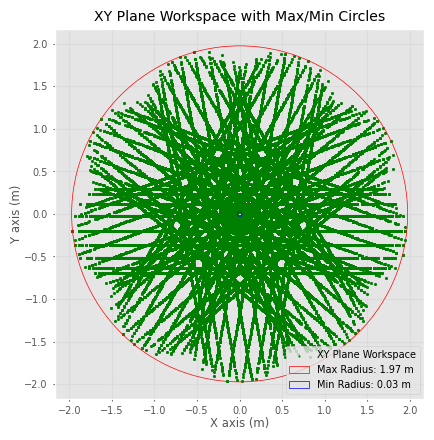

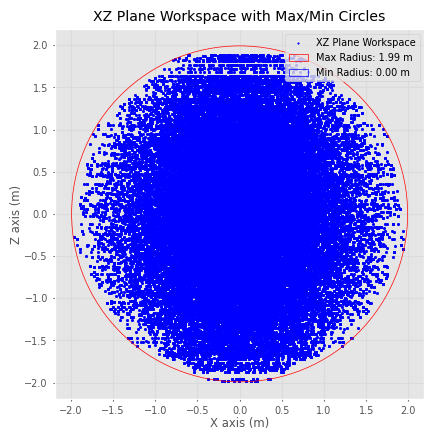

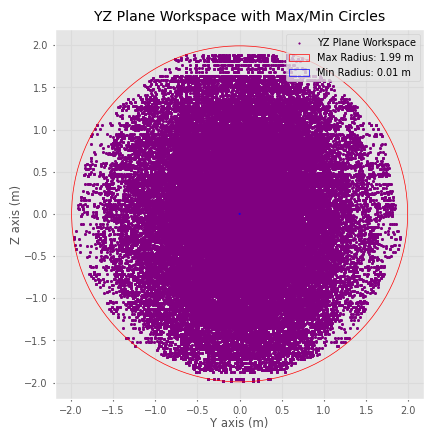

((1.9727246685894828, 0.02901047319658895),
 (1.9915717089527996, 0.004021045739390378),
 (1.9916811161212091, 0.00788699522741853))

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import roboticstoolbox as rtb
import math

# Given link lengths
L1 = 0.2
L2 = 0.7
L3 = 0.2
L4 = 0.7
L5 = 0.2
L6 = 0.3
L7 = 0.5

# Define the robot using DH Parameters
robot = rtb.DHRobot(
    [
        rtb.RevoluteMDH(offset=0),
        rtb.RevoluteMDH(alpha=-pi/2, d=L1, offset=-pi/2),
        rtb.PrismaticMDH(a=L2, qlim=[0, 0]),
        rtb.RevoluteMDH(d=-L3, offset=3*pi/4),
        rtb.RevoluteMDH(a=L4, offset=-pi/4),
        rtb.RevoluteMDH(d=L5, qlim=[0, 0]),
        rtb.RevoluteMDH(alpha=-pi/2, offset=-pi/2),
        rtb.RevoluteMDH(d=L6, qlim=[0, 0]),
        rtb.RevoluteMDH(alpha=-pi/2),
        rtb.RevoluteMDH(d=L7, qlim=[0, 0])
    ],
    name="RRR_robot"
)

# Storing positions for X-Y, X-Z, and Y-Z planes
x = []
y = []
z = []

# Generate joint angle values for iteration
q_values = np.linspace(-math.pi, math.pi, 10)

for q_1 in q_values:
    for q_2 in q_values:
        for q_3 in q_values:
            for q_4 in q_values:
                for q_5 in q_values:
                    for q_6 in q_values:
                        # Define q values
                        q = [
                            q_1,
                            q_2,
                            0,
                            q_3,
                            q_4,
                            0,  # this q is not a joint
                            q_5,
                            0,  # this q is not a joint
                            q_6,
                            0  # this q is not a joint
                        ]

                        # Forward kinematics
                        T = robot.fkine(q)
                        position = T.t  # End-effector position

                        # Store x, y, z positions
                        x.append(position[0])  # x-coordinate
                        y.append(position[1])  # y-coordinate
                        z.append(position[2])  # z-coordinate

# Calculate max and min radii for XY, XZ, and YZ planes
r_max_xy = np.sqrt(np.max(np.array(x)**2 + np.array(y)**2))
r_min_xy = np.sqrt(np.min(np.array(x)**2 + np.array(y)**2))

r_max_xz = np.sqrt(np.max(np.array(x)**2 + np.array(z)**2))
r_min_xz = np.sqrt(np.min(np.array(x)**2 + np.array(z)**2))

r_max_yz = np.sqrt(np.max(np.array(y)**2 + np.array(z)**2))
r_min_yz = np.sqrt(np.min(np.array(y)**2 + np.array(z)**2))

# Plot XY plane
plt.figure()
plt.scatter(x, y, c='green', s=1, label='XY Plane Workspace')
circle_max_xy = plt.Circle((0, 0), r_max_xy, color='r', fill=False, label=f'Max Radius: {r_max_xy:.2f} m')
circle_min_xy = plt.Circle((0, 0), r_min_xy, color='b', fill=False, label=f'Min Radius: {r_min_xy:.2f} m')
plt.gca().add_patch(circle_max_xy)
plt.gca().add_patch(circle_min_xy)
plt.xlabel('X axis (m)')
plt.ylabel('Y axis (m)')
plt.title('XY Plane Workspace with Max/Min Circles')
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Plot XZ plane
plt.figure()
plt.scatter(x, z, c='blue', s=1, label='XZ Plane Workspace')
circle_max_xz = plt.Circle((0, 0), r_max_xz, color='r', fill=False, label=f'Max Radius: {r_max_xz:.2f} m')
circle_min_xz = plt.Circle((0, 0), r_min_xz, color='b', fill=False, label=f'Min Radius: {r_min_xz:.2f} m')
plt.gca().add_patch(circle_max_xz)
plt.gca().add_patch(circle_min_xz)
plt.xlabel('X axis (m)')
plt.ylabel('Z axis (m)')
plt.title('XZ Plane Workspace with Max/Min Circles')
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Plot YZ plane
plt.figure()
plt.scatter(y, z, c='purple', s=1, label='YZ Plane Workspace')
circle_max_yz = plt.Circle((0, 0), r_max_yz, color='r', fill=False, label=f'Max Radius: {r_max_yz:.2f} m')
circle_min_yz = plt.Circle((0, 0), r_min_yz, color='b', fill=False, label=f'Min Radius: {r_min_yz:.2f} m')
plt.gca().add_patch(circle_max_yz)
plt.gca().add_patch(circle_min_yz)
plt.xlabel('Y axis (m)')
plt.ylabel('Z axis (m)')
plt.title('YZ Plane Workspace with Max/Min Circles')
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Display calculated radii for each plane
(r_max_xy, r_min_xy), (r_max_xz, r_min_xz), (r_max_yz, r_min_yz)


Max Radius: 1.9916819829101111
Min Radius: 0.10755173199089055


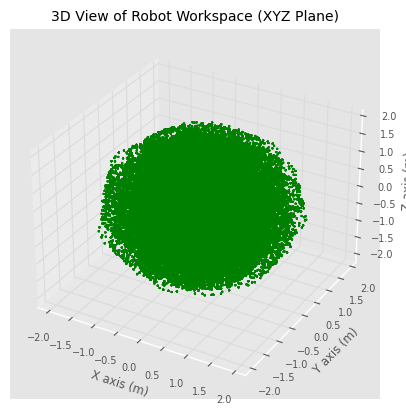

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # สำหรับการสร้างกราฟสามมิติ
from math import pi
import roboticstoolbox as rtb
import math

# กำหนดค่าความยาวลิงค์ตามที่คุณให้มา
L1 = 0.2
L2 = 0.7
L3 = 0.2
L4 = 0.7
L5 = 0.2
L6 = 0.3
L7 = 0.5

# สร้างหุ่นยนต์โดยใช้ DH Parameter
robot = rtb.DHRobot(
    [
        rtb.RevoluteMDH(offset= 0),
        rtb.RevoluteMDH(alpha= -pi/2,d = L1,offset=-pi/2),
        rtb.PrismaticMDH(a = L2,qlim=[0, 0]),
        rtb.RevoluteMDH(d= -L3,offset= 3*pi/4),
        rtb.RevoluteMDH(a=L4,offset=-pi/4),
        rtb.RevoluteMDH(d= L5,qlim=[0, 0]),
        rtb.RevoluteMDH(alpha=-pi/2,offset=-pi/2),
        rtb.RevoluteMDH(d= L6,qlim=[0, 0]),
        rtb.RevoluteMDH(alpha= -pi/2),
       rtb.RevoluteMDH(d= L7,qlim=[0, 0])
    ],
    name="RRR_robot"
)

# เก็บตำแหน่งในระนาบ X-Y-Z
x = []
y = []
z = []

q_values = np.linspace(-math.pi, math.pi, 10)

for q_1 in q_values:
    for q_2 in q_values:
        for q_3 in q_values:
            for q_4 in q_values:
                for q_5 in q_values:
                    for q_6 in q_values:
                        # Assign q directly since the values are already in radians
                        q = [
                            q_1,
                            q_2,
                            0,
                            q_3,
                            q_4,
                            0,  # this q is not a joint
                            q_5,
                            0,  # this q is not a joint
                            q_6,
                            0  # this q is not a joint
                        ]
                        
                        # Perform forward kinematics
                        T = robot.fkine(q)
                        position = T.t  # End-effector position
                        
                        # Store x, y, z positions
                        x.append(position[0])  # x-coordinate
                        y.append(position[1])  # y-coordinate
                        z.append(position[2])  # z-coordinate

# คำนวณรัศมีมากที่สุดและน้อยที่สุดในระนาบ X-Y
r_max = np.sqrt(np.max(np.array(x)**2 + np.array(y)**2 + np.array(z)**2))
r_min = np.sqrt(np.min(np.array(x)**2 + np.array(y)**2 + np.array(z)**2))

# สร้างกราฟแสดง workspace ในมุมมองสามมิติ (X-Y-Z)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# แสดง workspace
ax.scatter(x, y, z, c='green', s=1, label='Workspace')

# กำหนด Label สำหรับแกน X, Y, Z
ax.set_xlabel('X axis (m)')
ax.set_ylabel('Y axis (m)')
ax.set_zlabel('Z axis (m)')
ax.set_title('3D View of Robot Workspace (XYZ Plane)')

print(f"Max Radius: {r_max}")
print(f"Min Radius: {r_min}")

# แสดงกราฟ
plt.show()
